<a href="https://colab.research.google.com/github/varuncode01/Learning_AIML/blob/main/ST_DAY_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])
df_corr = int_columns_df.corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [ ]:
# Convert `PhoneService` column
df['PhoneService'] = df['PhoneService'].replace({'Yes': 1, 'No': 0, 'No phone service': 0})

# Convert `InternetService` column
df['InternetService'] = df['InternetService'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})

# Convert `MultipleLines` column
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2})

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

| customerID   | gender   | SeniorCitizen   | Partner   | Dependents   | tenure   | PhoneService   | MultipleLines   | InternetService   | OnlineSecurity   | OnlineBackup   | DeviceProtection   | TechSupport   | StreamingTV   | StreamingMovies   | Contract       | PaperlessBilling   | PaymentMethod             | MonthlyCharges   | TotalCharges   | Churn   |
|:-------------|:---------|:----------------|:----------|:-------------|:---------|:---------------|:----------------|:------------------|:-----------------|:---------------|:-------------------|:--------------|:--------------|:------------------|:---------------|:-------------------|:--------------------------|:-----------------|:---------------|:--------|
| 7590-VHVEG   | Female   | 0               | Yes       | No           | 1        | 0              | 0               | 1                 | No               | Yes            | No                 | No            | No            | No                | Month-to-month | Yes            

<Axes: >

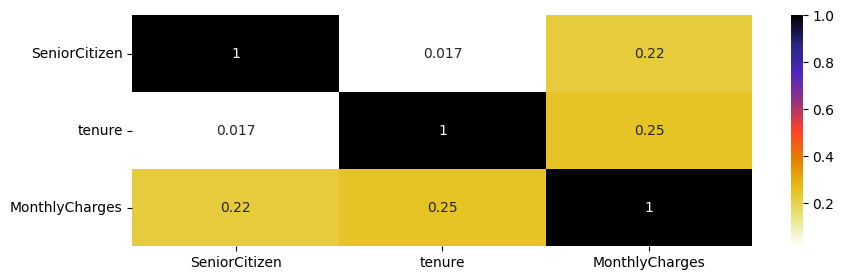

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(df_corr,annot=True,cmap=plt.cm.CMRmap_r)

x = df.drop(columns=['MultipleLines',	'InternetService'],axis=1)
y = df['PhoneService']

In [ ]:
# Import necessary metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Import classification specific metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Import models you intend to use
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor # Example of a tree-based regressor
from sklearn.ensemble import RandomForestRegressor # Example of another tree-based regressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Convert 'TotalCharges' to numeric, coercing errors to NaN, then drop rows with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID' column as it's a unique identifier and not useful for modeling
df.drop(columns=['customerID'], inplace=True)

# Apply LabelEncoder to binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling', 'Churn'] # Assuming 'Churn' is also a binary target if needed later

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Apply one-hot encoding to 'Contract' and 'PaymentMethod'
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)

# --- KNN Model Implementation ---

# Step 4: Split data into features (X) and target (y)
# Drop 'MultipleLines' from features as it is the target variable (y)
# Also drop 'PhoneService' and 'InternetService' as per original user code (though they are now numeric)
X = df.drop(columns=['PhoneService', 'InternetService', 'MultipleLines'], axis=1)
y = df['MultipleLines']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Implement KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this value
knn.fit(X_train_scaled, y_train)

# Step 8: Predictions
y_pred = knn.predict(X_test_scaled)

# Step 9: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6311300639658849

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.25      0.33       131
           1       0.61      0.71      0.66       654
           2       0.67      0.63      0.65       622

    accuracy                           0.63      1407
   macro avg       0.59      0.53      0.55      1407
weighted avg       0.63      0.63      0.62      1407


Confusion Matrix:
 [[ 33  70  28]
 [ 24 466 164]
 [ 10 223 389]]


In [ ]:
x_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1623,6035-RIIOM,Female,0,No,No,54,Yes,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
6074,3797-VTIDR,Male,0,Yes,No,1,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0684-AOSIH,Male,0,Yes,No,1,Yes,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5390,7450-NWRTR,Male,1,No,No,12,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [ ]:
y_train

,MultipleLines
6030,0
3410,1
5483,2
5524,1
6337,2
...,...
3778,2
5199,2
5235,2
5399,1


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a function to evaluate classification models
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    '''
    Trains the classification model, makes predictions, and prints
    accuracy, classification report, confusion matrix, and plots
    the confusion matrix.
    '''
    # Training the model
    print(f"Training {model.__class__.__name__}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred2 = model.predict(X_train)

    # Evaluation
    print("\n--- Model Evaluation ---")
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Training Accuracy: {accuracy_score(y_train, y_pred2):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plotting the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
                yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

Training KNeighborsClassifier...

--- Model Evaluation ---
Testing Accuracy: 0.6979
Training Accuracy: 0.8016

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       131
           1       0.68      0.73      0.70       654
           2       0.72      0.68      0.70       622

    accuracy                           0.70      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.70      0.70      0.70      1407


Confusion Matrix:
 [[ 81  43   7]
 [ 17 476 161]
 [ 19 178 425]]


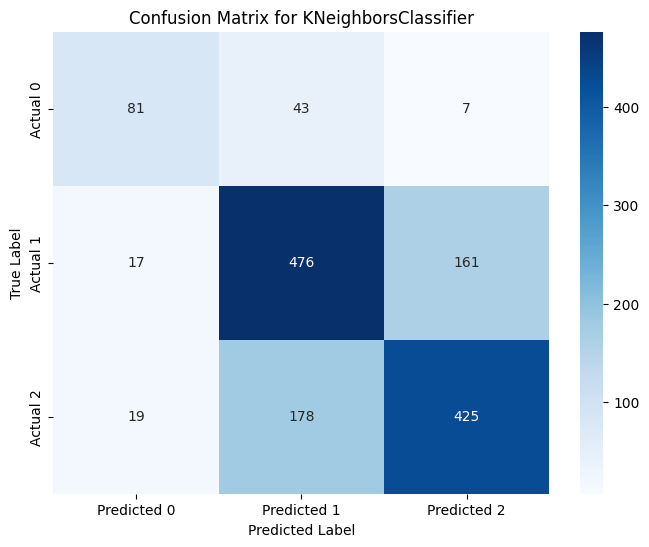

In [ ]:
evaluate_classifier(knn, X_train, X_test, y_train, y_test)

Training LogisticRegression...

--- Model Evaluation ---
Accuracy: 0.6923

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.07      0.13       131
           1       0.66      0.77      0.71       654
           2       0.72      0.74      0.73       622

    accuracy                           0.69      1407
   macro avg       0.76      0.53      0.52      1407
weighted avg       0.71      0.69      0.67      1407


Confusion Matrix:
 [[  9  95  27]
 [  0 504 150]
 [  1 160 461]]


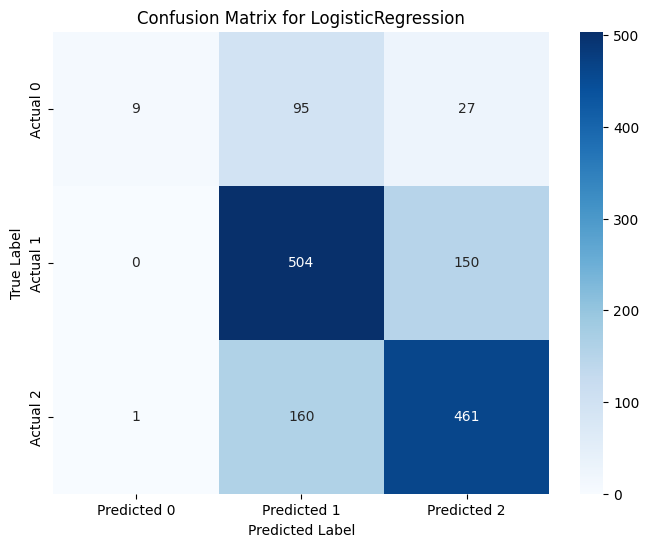

In [ ]:
evaluate_classifier(logistic_model, X_train_scaled, X_test_scaled, y_train, y_test)